In [6]:
import matplotlib.pyplot as plt
import numpy as np
import json
from matplotlib.ticker import FuncFormatter

In [7]:
path = '../../Input_Data/resource_data.json'
with open(path, 'r') as file:
    data = json.load(file)

wind_energy = data['series'][1]['data']
solar_energy = data['series'][2]['data']
hydro_energy = data['series'][3]['data']

In [8]:
# Have 165 hours and you want minute by minute resolution. Therefore the total length of this list needs to be 165 * 60 in length
# The first 60 values of the list need to equal 0, the next need to equal 1. Therefore, i // 60
wind_energy_7_days = [0 for _ in range(165 * 60)]
for i in range(len(wind_energy_7_days)):
    wind_energy_7_days[i] = wind_energy[ i // 60 ]['value']

solar_energy_7_days = [0 for _ in range(165 * 60)]
for i in range(len(solar_energy_7_days)):
    solar_energy_7_days[i] = solar_energy[ i // 60 ]['value']

hydro_energy_7_days = [0 for _ in range(165 * 60)]
for i in range(len(hydro_energy_7_days)):
    hydro_energy_7_days[i] = hydro_energy[ i // 60 ]['value']

day = 2
# resources = total[(24 * day) + start_time : (24 * day) + end_time]
resources = solar_energy_7_days[(24 * day) + 0 : (24 * day) + 1400]

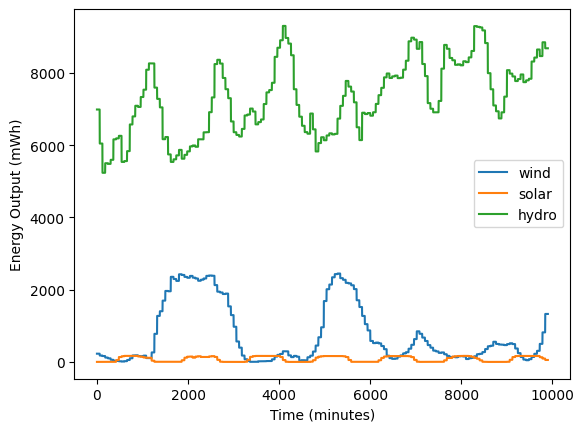

In [9]:
x_values = np.array([i for i in range(165 * 60)])

wind_graph_yvalues = np.array(wind_energy_7_days)
solar_graph_yvalues = np.array(solar_energy_7_days)
hydro_graph_yvalues = np.array(hydro_energy_7_days)

plt.plot(x_values, wind_graph_yvalues, label='wind')
plt.plot(x_values, solar_energy_7_days, label='solar')
plt.plot(x_values, hydro_energy_7_days, label='hydro')

plt.legend()
plt.xlabel("Time (minutes)")
plt.ylabel("Energy Output (mWh)")

plt.show()

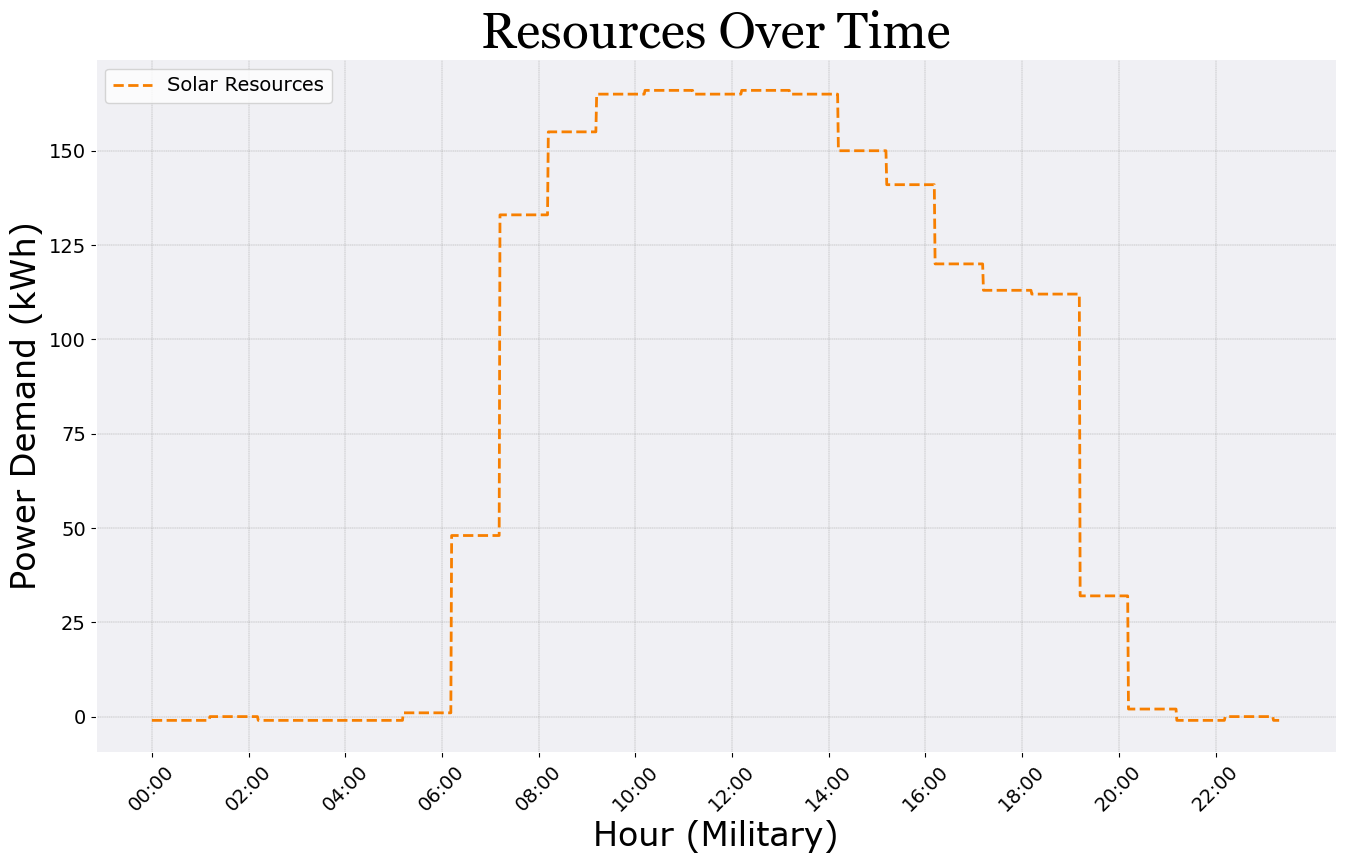

In [10]:
fig, ax = plt.subplots(figsize=(16,9))

# Set figure (outside) background
fig.patch.set_facecolor("#FFFFFF")

# Set axes (plot area) background
ax.set_facecolor("#f0f0f4")

# Plot data
job_graph_xvalues = np.array([i for i in range(0, 1400)])
ax.plot(job_graph_xvalues, resources, label="Solar Resources", linestyle='--', color = '#f77f00', linewidth=2)
# ax.plot(job_graph_xvalues, inexact_intervals, label="PDAC Inexact", linestyle='-', color = '#f77f00', linewidth=1)
# ax.plot(job_graph_xvalues, greedy_intervals, label="PDAC Greedy", linestyle=':', color = '#0081a7', linewidth=1)
# ax.plot(job_graph_xvalues, naive_intervals, label="PDAC Naive", linestyle='--', color = '#9448bc', linewidth=1)
# ax.plot(job_graph_xvalues, resources, label="Resources", linestyle='-.', color='#f74e00', linewidth=1)

ax.grid(True, linestyle='--', linewidth=0.25, color='grey')
plt.tick_params(axis='both', labelsize=14)
ax.set_xticks(np.arange(0, 1440, 120))  
x = list (range(0, 1440, 120))
def minutes_to_hours(x, pos):
    hours = int(x // 60)
    return f'{hours:02d}:00'
plt.gca().xaxis.set_major_formatter(FuncFormatter(minutes_to_hours))
for label in ax.get_xticklabels():
    label.set_rotation(45)
    label.set_horizontalalignment('center') 
# ax.set_yticks(np.arange(0, max(naive_intervals)+10, 10))

ax.set_title("Resources Over Time", fontsize=36, fontname="Georgia", color='black')
ax.set_xlabel("Hour (Military)", fontsize=24, fontname='Verdana', color='black')
ax.set_ylabel("Power Demand (kWh)", fontsize=24, fontname='Verdana', color='black')
ax.legend(loc='upper left', prop={'family': 'Verdana', 'size': 14})

ax.tick_params(colors='black')
for spine in ax.spines.values():
    spine.set_edgecolor('white')

# Save the figure to the Figures folder
plt.savefig(f"../../Output_Data/Final_Figures/resource_curve_visualization_color.png")
plt.show()